In [1]:
import numpy as np
from pylab import *
from scipy import ndimage
from scipy import misc
from scipy import linalg
from scipy import argsort
from scipy import signal
import os
import glob

import h5py as h5

import mayavi.mlab as mlab

%matplotlib inline
%load_ext imayavi

rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

#Stupid test to figure out 3D angles

In [2]:
def Make3Dtest(i, pos,radius, angx,angy,angz):
    [i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')
    
    #make a ball at position pos with radius
    C = np.exp(-((i1-pos[0])**2 + (i2-pos[1])**2 + (i3-pos[2])**2)/(2*radius**2))
    
    #rotate through the angles
    C = ndimage.interpolation.rotate(C, angx*180/pi, axes=(1,2), reshape=False)
    C = ndimage.interpolation.rotate(C, angy*180/pi, axes=(0,2), reshape=False)
    C = ndimage.interpolation.rotate(C, angz*180/pi, axes=(0,1), reshape=False)

    #also rotate the position
    pos2 = np.array(pos)
    
    if angx != 0:
        Rx = np.array([[1, 0, 0],
                       [0, np.cos(angx), -np.sin(angx)],
                       [0, np.sin(angx), np.cos(angx)]])
        pos2 = Rx.dot(pos2)
    if angy != 0:
        Ry = np.array([[np.cos(angy), 0, -np.sin(angy)],
                       [0, 1, 0],
                       [np.sin(angy), 0, np.cos(angy)]])
        pos2 = Ry.dot(pos2)
    if angz != 0:
        Rz = np.array([[np.cos(angz), -np.sin(angz), 0],
                       [np.sin(angz), np.cos(angz), 0],
                       [0, 0, 1]])
        pos2 = Rz.dot(pos2)

    
    return C, pos2

In [47]:
i = np.linspace(-2,2,32)
C,ax1 = Make3Dtest(i, [1,0,0],0.1, 0,70*pi/180,65*pi/180)
print ax1

[ 0.14454396  0.30997552  0.93969262]


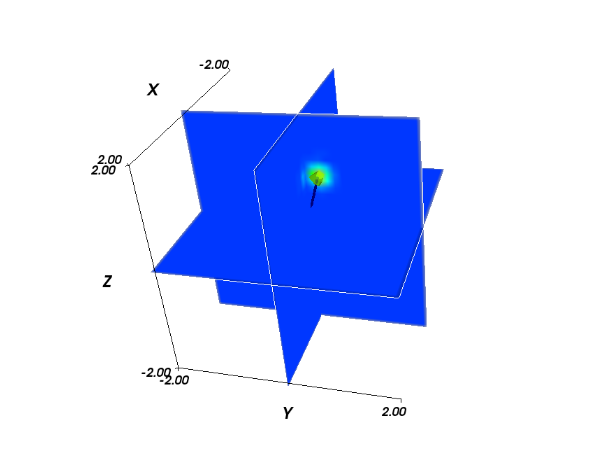

In [48]:
[i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')

mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))
sf = mlab.pipeline.scalar_field(i1,i2,i3,C)
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=16)

mlab.contour3d(i1,i2,i3,C,contours=[0.4,], opacity=0.7)
mlab.axes(extent=[-2,2, -2,2, -2,2])
mlab.plot3d([0,ax1[0]],[0,ax1[1]],[0,ax1[2]], color=(0,0,0.7))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

# Set up function for generating test matrices

In [49]:
def Gauss3DRot(i, sx,sy,sz, angx,angy,angz):
    [i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')
    
    #first make an image with the Gaussian
    C = np.exp(-(i1**2/(2*sx**2) + i2**2/(2*sy**2) + i3**2/(2*sz**2)))
    
    #and rotate to the appropriate angles
    C = ndimage.interpolation.rotate(C, angx*180/pi, axes=(1,2), reshape=False)
    C = ndimage.interpolation.rotate(C, angy*180/pi, axes=(0,2), reshape=False)
    C = ndimage.interpolation.rotate(C, angz*180/pi, axes=(0,1), reshape=False)
    
    #make the primary axis vector
    ax123 = np.eye(3)

    if angx != 0:
        Rx = np.array([[1, 0, 0],
                       [0, np.cos(angx), -np.sin(angx)],
                       [0, np.sin(angx), np.cos(angx)]])
        ax123 = Rx.dot(ax123)
    if angy != 0:
        Ry = np.array([[np.cos(angy), 0, -np.sin(angy)],
                       [0, 1, 0],
                       [np.sin(angy), 0, np.cos(angy)]])
        ax123 = Ry.dot(ax123)
    if angz != 0:
        Rz = np.array([[np.cos(angz), -np.sin(angz), 0],
                       [np.sin(angz), np.cos(angz), 0],
                       [0, 0, 1]])
        ax123 = Rz.dot(ax123)
    
    return C, ax123

## Test the function

Rotate about the y and z axis.

In [50]:
C,ax = Gauss3DRot(np.linspace(-2,2,33), 1,0.2,0.1, 0,60*pi/180,30*pi/180)

ax1 = ax[:,0]

In [51]:
ax1

array([ 0.4330127,  0.25     ,  0.8660254])

In [52]:
print 'Elevation={0} and Azimuth={1}'.format(np.arctan2(np.sqrt(ax1[0]**2 + ax1[1]**2),ax1[2])*180/pi, 
                                             np.arctan2(ax1[1],ax1[0])*180/pi)

Elevation=30.0 and Azimuth=30.0


3D visualization seems to show the angles better

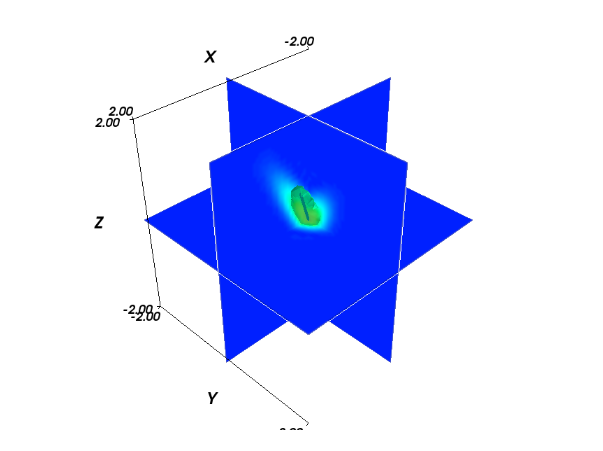

In [53]:
i = np.linspace(-2,2,33)
[i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')

mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))
sf = mlab.pipeline.scalar_field(i1,i2,i3,C)
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=16)
mlab.axes()

mlab.contour3d(i1,i2,i3,C,contours=[0.4,], opacity=0.7)
mlab.plot3d([0,ax1[0]],[0,ax1[1]],[0,ax1[2]], color=(0,0,0.7))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

# Set up fiber angle computation

## First compute the Hessian matrix at the center of the volume

In [56]:
def hessian_ctr3(di, C):
    a1 = np.array([-1.0, 9.0, -45.0, 0.0, 45.0, -9.0, 1.0])/60
    a2 = np.array([2, -27, 270, -490, 270, -27, 2])/180.0

    #round down
    n = len(a1)//2
    #round up if lengths are odd
    c = (np.array(C.shape)+1)//2
    c = c[0]
    
    ic = np.arange(c-n,c+n+1)
    
    H = np.zeros((3,3))
    H[0,0] = sum(C[ic,c,c] * a2) / di**2
    H[1,1] = sum(C[c,ic,c] * a2) / di**2
    H[2,2] = sum(C[c,c,ic] * a2) / di**2
    
    ic1 = ic[:,np.newaxis]
    ic2 = ic[np.newaxis,:]
    
    H[0,1] = np.sum( np.sum( C[ic1,ic2,c] * a1[:,np.newaxis], axis=0) * a1) / di**2
    H[0,2] = np.sum( np.sum( C[ic1,c,ic2] * a1[:,np.newaxis], axis=0) * a1) / di**2
    H[1,2] = np.sum( np.sum( C[c,ic1,ic2] * a1[:,np.newaxis], axis=0) * a1) / di**2

    H[1,0] = H[0,1]
    H[2,0] = H[0,2]
    H[2,1] = H[1,2]
    
    return H

In [57]:
di = 4.0/32
H = hessian_ctr3(di, C)
np.around(H, decimals=3)

array([[-25.012,   0.735,   9.929],
       [  0.735, -13.718,   0.907],
       [  9.929,   0.907,  -9.088]])

# Then use the eigenvector with the smallest eigenvalue to estimate the primary axis

In [58]:
def get_angle3(di,C):
    H = hessian_ctr3(di,C)
    w,vr = linalg.eig(H)
    
    ord = argsort(np.abs(w))
    vr = vr[:,ord]
    
    return vr

## Test the angle estimate

In [60]:
i = np.linspace(-2,2,32)
di = i[1]-i[0]

C,ax = Gauss3DRot(i, 1,0.4,0.2, 0,35*180/pi,45*180/pi)
axest = get_angle3(di, C)

disp(np.around(ax, decimals=3))
disp(np.around(axest, decimals=3))

[[-0.312 -0.806  0.503]
 [ 0.425 -0.592 -0.685]
 [ 0.85   0.     0.527]]
[[-0.31  -0.815  0.49 ]
 [ 0.425 -0.58  -0.695]
 [ 0.851 -0.008  0.526]]


## Get angle error

In [61]:
def angle_error(i, sx,sy,sz, angx, angy, angz):
    di = i[1] - i[0]
    
    err = []
    for angx1 in angx:
        for angy1 in angy:
            for angz1 in angz:
                C,ax = Gauss3DRot(i, sx,sy,sz, angx1,angy1,angz1)
                axest = get_angle3(di, C)
                
                d1 = np.dot(ax[:,0], axest[:,0])
                d2 = np.dot(ax[:,1], axest[:,1])
                d3 = np.dot(ax[:,2], axest[:,2])
                
                err.append(np.arccos(np.abs(np.array([d1,d2,d3]))))
    return np.transpose(err)

In [64]:
angxtest = [0]
angytest = np.linspace(0,pi,6)
angztest = np.linspace(0,pi,6)
i = np.linspace(-2,2,32)

err = angle_error(i, 1,0.4,0.2, angxtest,angytest,angztest)

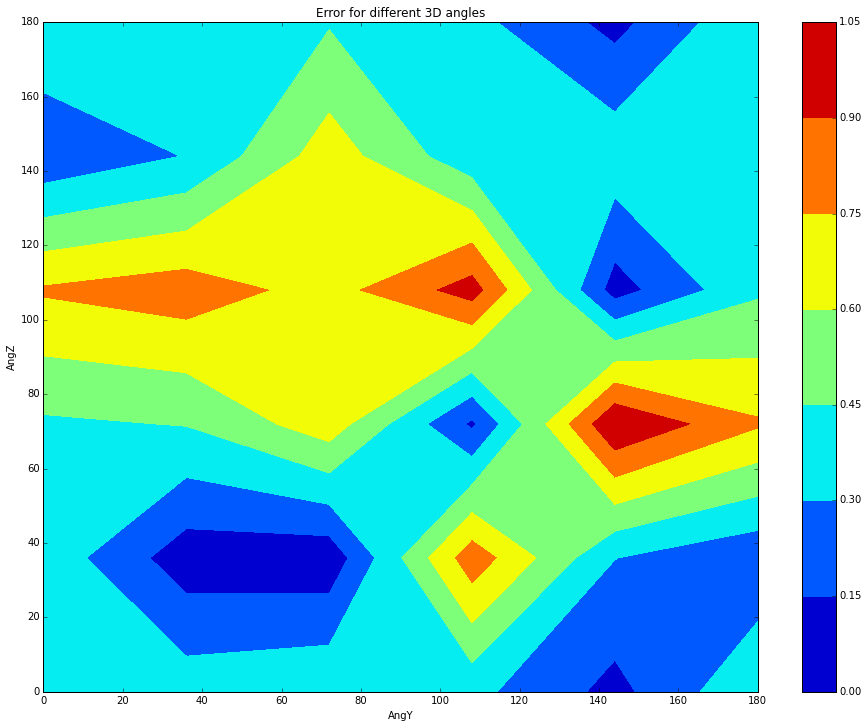

In [65]:
c = contourf(angytest*180/pi,angztest*180/pi, np.reshape(err[0,:]*180/pi,[len(angytest), len(angztest)]))
colorbar(c)
xlabel('AngY')
ylabel('AngZ')
title('Error for different 3D angles')
show()

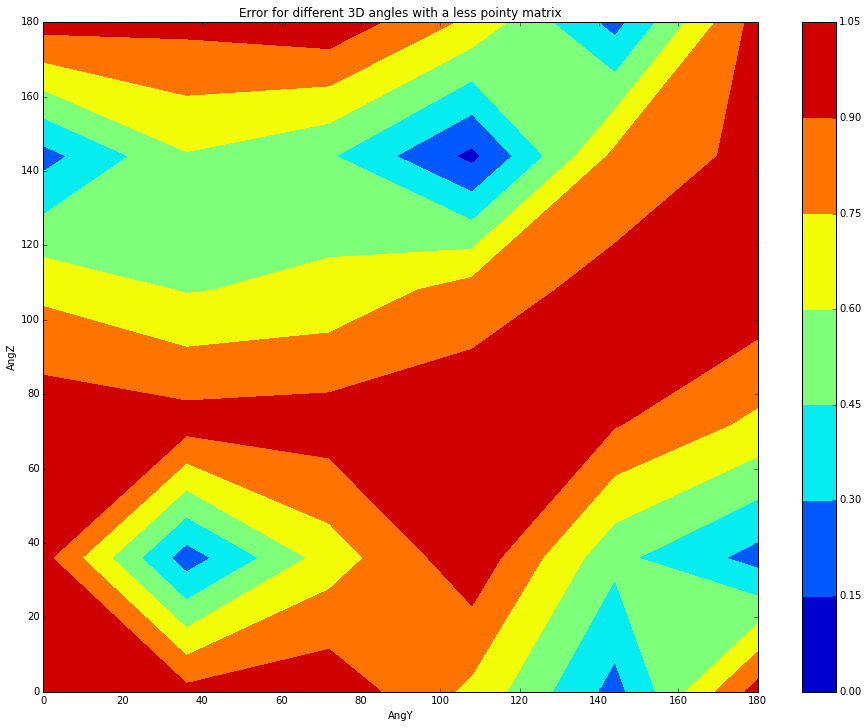

In [66]:
angxtest = [0]
angytest = np.linspace(0,pi,6)
angztest = np.linspace(0,pi,6)
i = np.linspace(-2,2,32)

err = angle_error(i, 1,0.8,0.8, angxtest,angytest,angztest)

c = contourf(angytest*180/pi,angztest*180/pi, np.reshape(err[0,:]*180/pi,[len(angytest), len(angztest)]))
colorbar(c)
xlabel('AngY')
ylabel('AngZ')
title('Error for different 3D angles with a less pointy matrix')
show()

# Now test on simulated fibers

In [67]:
def make_fiber_volume(ctrx,ctry,rx,ry, i, angy,angz):
    '''Makes a volume with simulated fibers at positions ctrx,ctry and radii rx,ry.
    i is the size and resolution.  angy and angz are rotations about the y and z axes in radians'''
    [i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')
    
    #first make an image with the fibers
    I1 = np.zeros((len(i),len(i)), dtype=np.uint16)
    for (ctrx1,ctry1,rx1,ry1) in zip(ctrx,ctry,rx,ry):
        r1 = (((i1[:,:,1]-ctrx1)/rx1)**2 + ((i2[:,:,1]-ctry1)/ry1)**2)
        I1 = I1 + np.exp(-r1)
    
    #then stack it along the z direction
    V = np.tile(I1[:,:,np.newaxis], (1,1,len(i)))
    #and rotate to the appropriate angles
    V = ndimage.interpolation.rotate(V, angy*180/pi, axes=(0,2), reshape=False)
    V = ndimage.interpolation.rotate(V, angz*180/pi, axes=(0,1), reshape=False)
    
    #make the primary axis vector
    ax123 = np.eye(3)
    if np.sum(rx) > np.sum(ry):
        ax123 = ax123[:,[2, 0, 1]]
    else:
        ax123 = ax123[:,[2, 1, 0]]
    
    if angy != 0:
        Ry = np.array([[np.cos(angy), 0, -np.sin(angy)],
                       [0, 1, 0],
                       [np.sin(angy), 0, np.cos(angy)]])
        ax123 = Ry.dot(ax123)

    if angz != 0:
        Rz = np.array([[np.cos(angz), -np.sin(angz), 0],
                       [np.sin(angz), np.cos(angz), 0],
                       [0, 0, 1]])
        ax123 = Rz.dot(ax123)
        
    return V,ax123

In [19]:
ctrx = [-1.3, -1.0, -0.7, 0.1,  0.5,  1.4, 1.2]
ctry = [-1.7, 0.6,  -0.8, -1.3, 1.4,  0.1, -0.6]
rx =   [0.6,  0.3,  0.5,  0.2,  0.4,  0.2, 0.4]
ry = np.multiply(rx,0.5)

i = np.linspace(-2,2,32)

V,ax0 = make_fiber_volume(ctrx,ctry,rx,ry, i, 15*pi/180, 0)
ax0[:,0]

array([-0.25881905,  0.        ,  0.96592583])

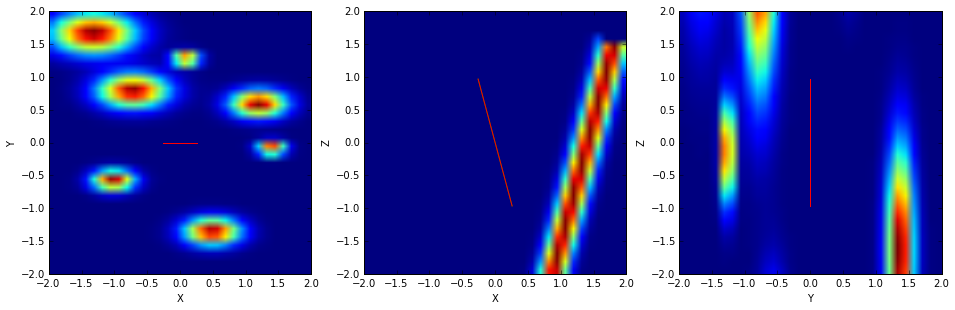

In [20]:
ax1 = ax0[:,0]
ax2 = ax0[:,0]

subplot(1,3,1)
imshow(np.transpose(V[:,:,16]), extent=(-2,2,-2,2))
plot([ax1[0], -ax1[0]], [ax1[1], -ax1[1]], 'g-',
     [ax2[0], -ax2[0]], [ax2[1], -ax2[1]], 'r-')

xlabel('X')
ylabel('Y')

subplot(1,3,2)
imshow(np.transpose(V[:,16,:]), extent=(-2,2,-2,2))
plot([ax1[0], -ax1[0]], [ax1[2], -ax1[2]], 'g-',
     [ax2[0], -ax2[0]], [ax2[2], -ax2[2]], 'r-')

xlabel('X')
ylabel('Z')

subplot(1,3,3)
imshow(np.transpose(V[16,:,:]), extent=(-2,2,-2,2))
plot([ax1[1], -ax1[1]], [ax1[2], -ax1[2]], 'g-',
     [ax2[1], -ax2[1]], [ax2[2], -ax2[2]], 'r-')


xlabel('Y')
ylabel('Z')

show()

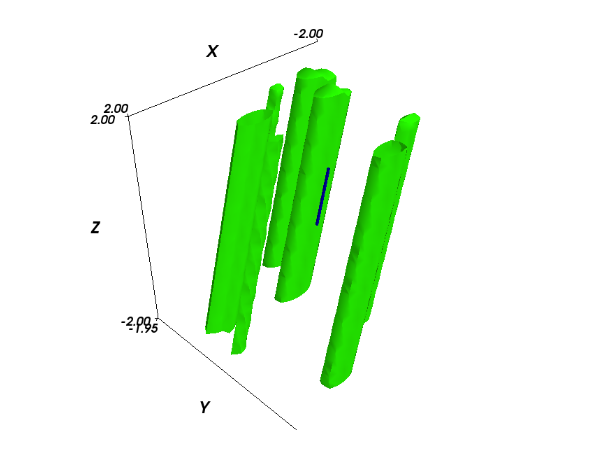

In [21]:
[i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')
mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))
mlab.contour3d(i1,i2,i3,V,contours=[0.5,])
mlab.axes()
mlab.plot3d([0,ax0[0,0]],[0,ax0[1,0]],[0,ax0[2,0]], color=(0,0,0.7))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

In [22]:
def get_volume_autocorr_fft(V, **kwargs):
    #first construct a window for the FFT
    sz = V.shape
    assert(all(np.equal(sz,sz[0])))
    
    wind1 = np.hamming(sz[0])
    wind = wind1[:,np.newaxis,np.newaxis] * wind1[np.newaxis,:,np.newaxis] * wind1[np.newaxis,np.newaxis,:]
    
    #multiply by the window
    V = V*wind
    
    #and get the autocorrelation volume
    F1 = np.fft.fftn(V)
    C = np.fft.ifftn(F1 * np.conjugate(F1))

    C = np.fft.fftshift(C)

    return C

In [23]:
def get_volume_autocorr_direct(V, insz=None, **kwargs):
    outsz = V.shape
    if insz is None:
        raise ValueError("insz must not be None")
    
    inrng = [slice(np.floor_divide(out1,2)-np.floor_divide(in1,2),
            np.floor_divide(out1,2)-np.floor_divide(in1,2)+in1)
            for (in1,out1) in zip(insz,outsz)]
    
    C = signal.convolve(V[::-1,::-1,::-1],V[inrng],mode='valid')
    
    return C

In [24]:
def get_volume_autocorr_fftconvolve(V, insz=None, **kwargs):
    outsz = V.shape
    if insz is None:
        raise ValueError("insz must not be None")
    
    inrng = [slice(np.floor_divide(out1,2)-np.floor_divide(in1,2),
            np.floor_divide(out1,2)-np.floor_divide(in1,2)+in1)
            for (in1,out1) in zip(insz,outsz)]
    
    C = signal.fftconvolve(V[::-1,::-1,::-1],V[inrng],mode='valid')
    
    return C

## First test on random noise

Should be high correlation only at zero displacement, and low correlation everywhere else

In [25]:
Vrand = np.random.randn(32,32,32)

In [30]:
A1 = get_volume_autocorr_fft(Vrand)
A2 = get_volume_autocorr_direct(Vrand,insz=(16,16,16))
A3 = get_volume_autocorr_fftconvolve(Vrand,insz=(16,16,16))
A4 = signal.convolve(Vrand[::-1,::-1,::-1],Vrand,mode='valid')

In [27]:
print V.shape
print A1.shape
print A2.shape
print A3.shape
print A4.shape

(32, 32, 32)
(32, 32, 32)
(17, 17, 17)
(17, 17, 17)
(1, 1, 1)


In [31]:
A4

array([[[ 32974.18964121]]])

In [32]:
print [np.min(real(A1)),np.max(real(A1))]
print [np.min(real(A2)),np.max(real(A2))]
print [np.min(real(A3)),np.max(real(A3))]

[-81.954256471335327, 1847.6714667540969]
[-225.95963977190536, 4044.9052821456257]
[-225.95963977190485, 4044.9052821456216]


In [33]:
ind = np.argmax(real(A3))
ctr = np.unravel_index(ind,A3.shape)
print ctr

(8, 8, 8)


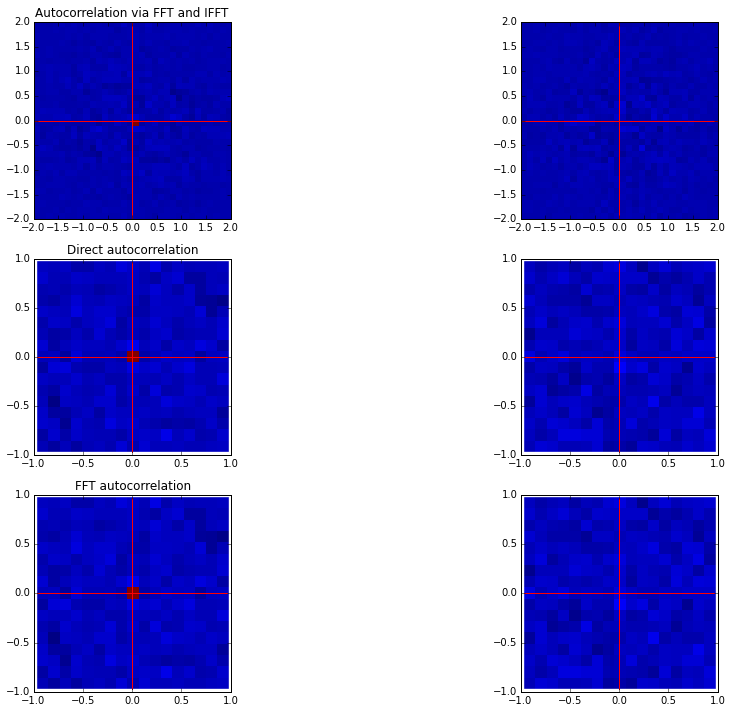

In [36]:
f,axs = subplots(3,2)
axs[0,0].imshow(real(A1[:,:,16]),extent=(i[0],i[-1],i[0],i[-1]), interpolation='nearest',
               vmin=np.min(real(A1)),vmax=np.max(real(A1)))
axs[0,0].plot([0,0],[-2,2],'r-',[-2,2],[0,0],'r-')
axs[0,0].set_title('Autocorrelation via FFT and IFFT')

axs[0,1].imshow(real(A1[:,:,17]),extent=(i[0],i[-1],i[0],i[-1]), interpolation='nearest',
               vmin=np.min(real(A1)),vmax=np.max(real(A1)))
axs[0,1].plot([0,0],[-2,2],'r-',[-2,2],[0,0],'r-')

axs[1,0].imshow(real(A2[:,:,8]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A2)),vmax=np.max(real(A2)))
axs[1,0].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')
axs[1,0].set_title('Direct autocorrelation')

axs[1,1].imshow(real(A2[:,:,9]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A2)),vmax=np.max(real(A2)))
axs[1,1].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')

axs[2,0].imshow(real(A3[:,:,8]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A3)),vmax=np.max(real(A3)))
axs[2,0].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')
axs[2,0].set_title('FFT autocorrelation')

axs[2,1].imshow(real(A3[:,:,9]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A3)),vmax=np.max(real(A3)))
axs[2,1].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')

show()

## Now test on the fiber image

In [68]:
A1 = get_volume_autocorr_fft(V)
A2 = get_volume_autocorr_direct(V,insz=(16,16,16))
A3 = get_volume_autocorr_fftconvolve(V,insz=(16,16,16))

In [69]:
print [np.min(real(A1)),np.max(real(A1))]
print [np.min(real(A2)),np.max(real(A2))]
print [np.min(real(A3)),np.max(real(A3))]

[0.32926100399790137, 69.505934713031323]
[0.11731218315209668, 224.17659475098731]
[0.11731218315211181, 224.17659475098722]


In [70]:
ind = np.argmax(real(A3))
ctr = np.unravel_index(ind,A3.shape)
print ctr

(10, 8, 2)


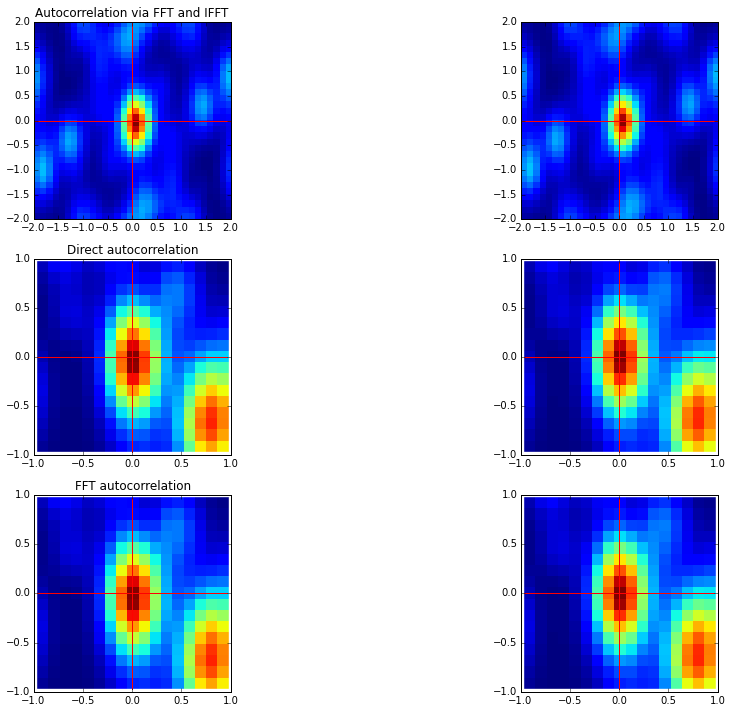

In [71]:
f,axs = subplots(3,2)
axs[0,0].imshow(real(A1[:,:,16]),extent=(i[0],i[-1],i[0],i[-1]), interpolation='nearest',
               vmin=np.min(real(A1)),vmax=np.max(real(A1)))
axs[0,0].plot([0,0],[-2,2],'r-',[-2,2],[0,0],'r-')
axs[0,0].set_title('Autocorrelation via FFT and IFFT')

axs[0,1].imshow(real(A1[:,:,17]),extent=(i[0],i[-1],i[0],i[-1]), interpolation='nearest',
               vmin=np.min(real(A1)),vmax=np.max(real(A1)))
axs[0,1].plot([0,0],[-2,2],'r-',[-2,2],[0,0],'r-')

axs[1,0].imshow(real(A2[:,:,8]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A2)),vmax=np.max(real(A2)))
axs[1,0].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')
axs[1,0].set_title('Direct autocorrelation')

axs[1,1].imshow(real(A2[:,:,9]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A2)),vmax=np.max(real(A2)))
axs[1,1].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')

axs[2,0].imshow(real(A3[:,:,8]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A3)),vmax=np.max(real(A3)))
axs[2,0].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')
axs[2,0].set_title('FFT autocorrelation')

axs[2,1].imshow(real(A3[:,:,9]),extent=(i[8],i[-9],i[8],i[-9]), interpolation='nearest',
               vmin=np.min(real(A3)),vmax=np.max(real(A3)))
axs[2,1].plot([0,0],i[[8,-9]],'r-',i[[8,-9]],[0,0],'r-')

show()

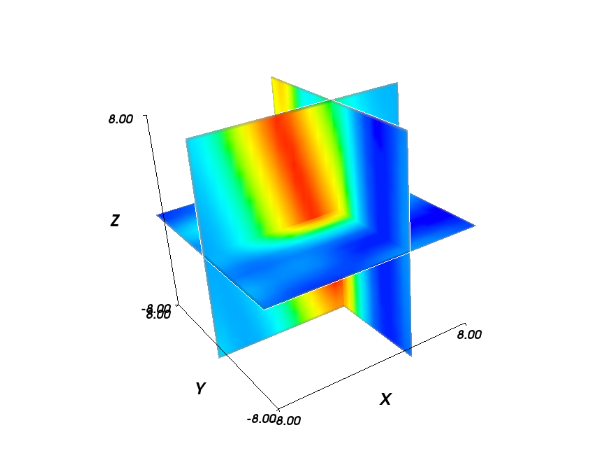

In [41]:
i = np.arange(A3.shape[0])
i = i - (np.sum(i[[0, -1]])/2)
[i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')

mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))
sf = mlab.pipeline.scalar_field(i1,i2,i3,A3)
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=int(len(i)/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=int(len(i)/2))
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=int(len(i)/2))
mlab.axes()

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))

In [42]:
ind = np.argmax(A3)
np.unravel_index(ind, A3.shape)

(10, 8, 2)

In [44]:
def get_fiber_angle(V,autocorrfcn=get_volume_autocorr_fftconvolve,**kwargs):
    #get the autocorrelation
    C = autocorrfcn(V,**kwargs)
    
    #then estimate the angle of the autocorrelation peak
    H = hessian_ctr3(1,C)
    w,vr = linalg.eig(H)
    
    ord = argsort(np.abs(w))
    vr = vr[:,ord]
    w = w[ord]
    
    return vr, w

## Test on many fiber angles

In [72]:
angytest = np.linspace(0,pi,6)
angztest = np.linspace(0,pi,6)
i = np.linspace(-2,2,32)

err = []
for angy1 in angytest:
    for angz1 in angztest:
        C,ax = make_fiber_volume(ctrx,ctry,rx,ry, i, angy1,angz1)
        axest,w = get_fiber_angle(C, insz=(16,16,16))

        d1 = np.dot(ax[:,0], axest[:,0])
        d2 = np.dot(ax[:,1], axest[:,1])
        d3 = np.dot(ax[:,2], axest[:,2])

        err.append(np.arccos(np.abs(np.array([d1,d2,d3]))))
err = np.transpose(err)

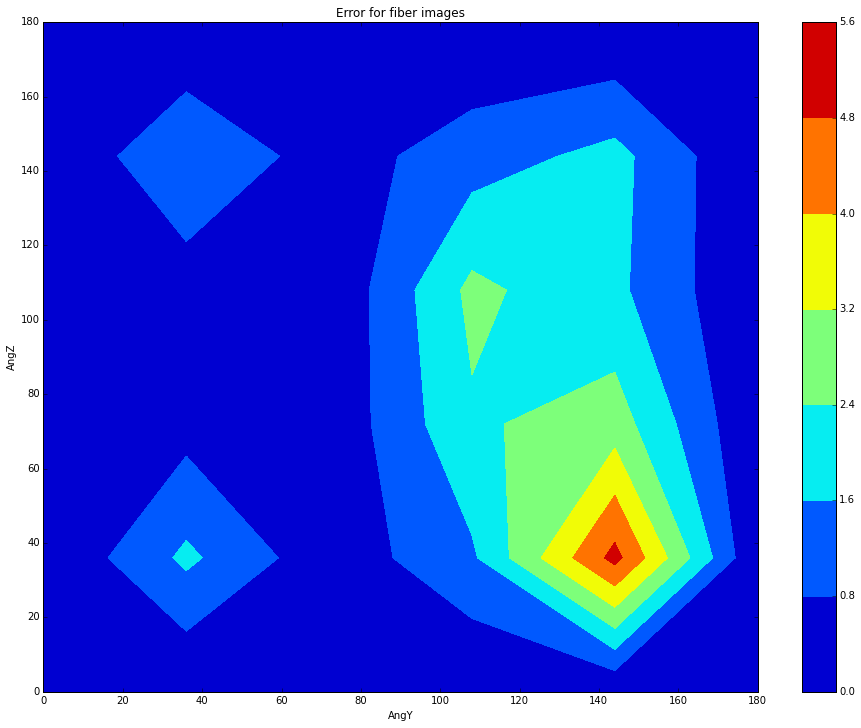

In [73]:
c = contourf(angytest*180/pi,angztest*180/pi, np.reshape(err[0,:]*180/pi,[len(angytest), len(angztest)]))
colorbar(c)
xlabel('AngY')
ylabel('AngZ')
title('Error for fiber images')
show()

# Test on real data

In [74]:
infile = 'Drerio4.h5'

In [75]:
f = h5.File(infile,'a')
imgdata = f['image']
print imgdata.shape

(690, 1235, 2237)


Find a spot with good fibers

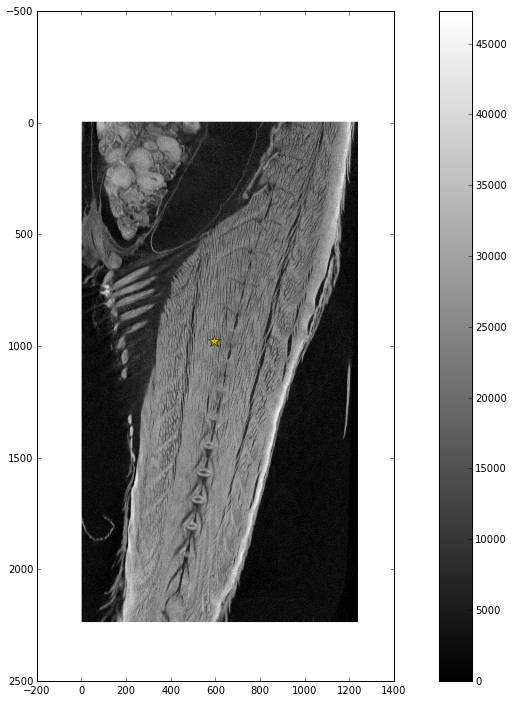

In [76]:
ctr = (300,592,976)

I = np.array(imgdata[ctr[0],:,:])
imshow(I.transpose(), cmap=cm.gray)
colorbar()

plot(ctr[1],ctr[2],'y*',markersize=12)
show()

Load a small volume at that spot

In [77]:
volsz = 32
v2 = int(volsz/2)
loc = tuple([slice(c1-v2,c1+v2) for c1 in ctr])

V = imgdata[loc]

Plot the same x axis slice to make sure there are fibers

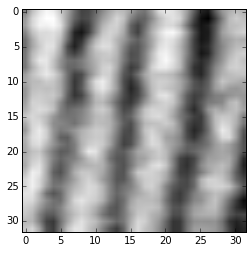

In [78]:
figure(figsize=(4,4))
imshow(V[v2,:,:].transpose(), cmap=cm.gray)
show()

In [80]:
C = get_volume_autocorr_fftconvolve(V, insz=(16,16,16))
vr, w = get_fiber_angle(V, insz=(16,16,16))

In [81]:
vr[:,0]

array([ 0.02840533, -0.0126668 ,  0.99951623])

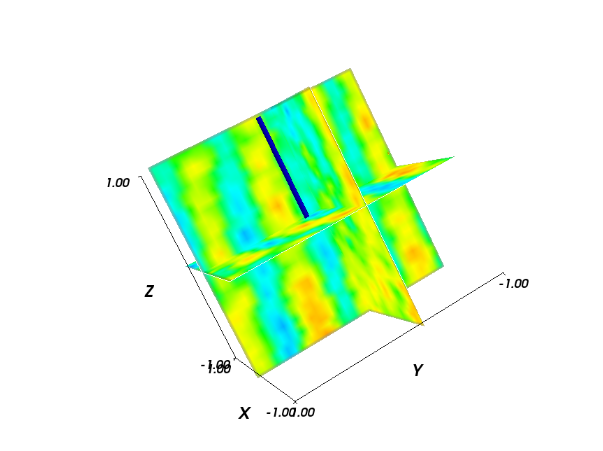

In [82]:
i = np.linspace(-1,1,32)
[i1,i2,i3] = np.meshgrid(i,i,i, indexing='ij')

mlab.figure(bgcolor=(1,1,1), fgcolor=(0,0,0))
sf = mlab.pipeline.scalar_field(i1,i2,i3,V)
mlab.pipeline.image_plane_widget(sf, plane_orientation='x_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='y_axes',
                                 slice_index=16)
mlab.pipeline.image_plane_widget(sf, plane_orientation='z_axes',
                                 slice_index=16)
mlab.axes()

mlab.contour3d(i1,i2,i3,V/np.max(V),contours=[0.8,], opacity=0.7)
mlab.plot3d([0,vr[0,0]],[0,vr[1,0]],[0,vr[2,0]], color=(0,0,0.7))

mlab.show(stop=True)

mayavi_show_inline(size=(800,600))